# Cleaning Second  Dataset  From US Health Breaches Data






<span style="font-size: 16px;">
    

    
 **The following will be done to ensure the right features are extracted**:<br>  
    
    
  <p>
    
 
 1.   ***Load the file, and extract timeline from 2014 to 2023*** <br>
    
   
    
   <br>
    
  
  2.  ***Drop the columns with the entities and other columns not needed and leave only the date, and Type of attacks     columns.***
    
  <br>
    
 3.   ***Extract cyber attack types from the web description of attacks, this should be done before step 2 above.***
    
    
  <br> 
    
    
 4. ***Add extracted cyber attack types to the 'attack type' column while retaining attack types such as unauthorised 
    access and theft in the original column.***
 
  <br>   
      
      
  5. ***Extract timelines 2014-2023, then save separate files, 2014_2022 and 2023 only.***
    
  </p>
    
 </span>

In [1]:
# Import important libraries

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import seaborn as sns
import numpy as np

In [2]:
# Path to the uploaded file

# Uncomment this out and replace with own file path..

uploaded_file_path = "/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/RAW_DATA/breach_report.csv"

# Reading the CSV file into a Pandas DataFrame

df = pd.read_csv(uploaded_file_path)

# Displaying the first few rows to review the contents
df.head(15)


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,SEVA Medical Group LLC,VA,Healthcare Provider,690.0,06/19/2023,Unauthorized Access/Disclosure,Email,No,"The covered entity (CE), SEVA Medical Group, r..."
1,"Sesame, Inc.",NY,Business Associate,1809.0,05/12/2023,Unauthorized Access/Disclosure,Network Server,Yes,"The business associate (BA), Sesame, Inc., rep..."
2,Oyate Health Center,SD,Healthcare Provider,575.0,05/02/2023,Improper Disposal,Paper/Films,No,NaN
3,"Brightside Health, Inc.",CA,Healthcare Provider,767.0,04/30/2023,Unauthorized Access/Disclosure,"Electronic Medical Record, Other",No,"The covered entity (CE), Brightside Health, re..."
4,Integrated Medical Services,AZ,Healthcare Provider,6591.0,04/17/2023,Unauthorized Access/Disclosure,Paper/Films,No,"The covered entity (CE), Integrated Medical Se..."
5,Presence Healthcare Services dba Presence Medi...,IL,Healthcare Provider,921.0,04/14/2023,Unauthorized Access/Disclosure,Paper/Films,No,"The covered entity (CE), Presence Healthcare S..."
6,John Muir Health - Walnut Creek Medical Center,CA,Healthcare Provider,821.0,04/13/2023,Unauthorized Access/Disclosure,Network Server,No,"The covered entity (CE), John Muir Health – Wa..."
7,"Pathway Healthcare, LLC",AL,Healthcare Provider,1304.0,04/11/2023,Unauthorized Access/Disclosure,Email,No,"The covered entity (CE), Pathway Healthcare, r..."
8,Centers for Medicare & Medicaid Services,MD,Health Plan,10011.0,04/07/2023,Unauthorized Access/Disclosure,Paper/Films,Yes,"The covered entity (CE), Centers for Medicare ..."
9,"Yardley Dermatology Associates, PC",PA,Healthcare Provider,523.0,03/21/2023,Unauthorized Access/Disclosure,Email,No,"The covered entity (CE), Yardley Dermatology A..."


In [3]:
# Inspect data types


data_types = df.dtypes
data_types


Name of Covered Entity               object
State                                object
Covered Entity Type                  object
Individuals Affected                float64
Breach Submission Date               object
Type of Breach                       object
Location of Breached Information     object
Business Associate Present           object
Web Description                      object
dtype: object

In [4]:
# Checking for total missing values


missing_values = df.isnull().sum()

missing_values


Name of Covered Entity                0
State                                12
Covered Entity Type                   4
Individuals Affected                  1
Breach Submission Date                0
Type of Breach                        1
Location of Breached Information      0
Business Associate Present            0
Web Description                     266
dtype: int64

In [5]:
# Drop irrelavant columns, such as 'name of covered entity', 'state' due to data privacy...


df_cleaned = df.drop(columns=['Name of Covered Entity', 'Covered Entity Type','State','Individuals Affected','Location of Breached Information','Business Associate Present'])

# Displaying the first few rows to review the updated DataFrame
df_cleaned.tail(10)


,Breach Submission Date,Type of Breach,Web Description
4649,11/23/2009,Theft,A laptop computer was stolen from a workforce ...
4650,11/20/2009,Theft,A shared Computer that was used for backup was...
4651,11/20/2009,Theft,A shared Computer that was used for backup was...
4652,11/20/2009,Theft,A shared Computer that was used for backup was...
4653,11/20/2009,Theft,A shared Computer that was used for backup was...
4654,11/20/2009,Theft,A shared Computer that was used for backup was...
4655,11/17/2009,Loss,A laptop was lost by an employee while in tran...
4656,10/30/2009,Theft,The Alaska Department of Health and Social Ser...
4657,10/28/2009,Theft,Five desktop computers containing unencrypted ...
4658,10/21/2009,Theft,A binder containing the protected health infor...


### Step 3: Extract Specific Keywords and Create "Attack Type" Column

##### Extract keywords like "ransomware," "malware," "phishing," and "hacking" from the "Web Description" column and create a new "Attack 

##### Type" column. If the "Type of Breach" column contains "Unauthorized Access" or "Theft," they will be  retained  in the new "Attack Type" column as well.

In [6]:
# Keywords to search for

attack_keywords = ["ransomware", "phishing", "hacking", "malware"]

# Function to update the "Attack Type" column based on "Web Description" and "Type of Breach"

def create_attack_type(row):
    # Check for specific keywords in "Web Description"
    for keyword in attack_keywords:
        if keyword in str(row['Web Description']).lower():
            return keyword.capitalize()

    # Check for "Unauthorized Access" and "Theft" in "Type of Breach"
    
    if "Unauthorized Access" in str(row['Type of Breach']):
        return "Unauthorized Access/Disclosure"
    
    if "Theft" in str(row['Type of Breach']):
        return "Theft"

    return row['Type of Breach']

# Applying the function to create the "Attack Type" column

df_cleaned['Attack Type'] = df_cleaned.apply(create_attack_type, axis=1)

# Displaying the first few rows to review the updated DataFrame

df_cleaned.head(15)


,Breach Submission Date,Type of Breach,Web Description,Attack Type
0,06/19/2023,Unauthorized Access/Disclosure,"The covered entity (CE), SEVA Medical Group, r...",Unauthorized Access/Disclosure
1,05/12/2023,Unauthorized Access/Disclosure,"The business associate (BA), Sesame, Inc., rep...",Unauthorized Access/Disclosure
2,05/02/2023,Improper Disposal,NaN,Improper Disposal
3,04/30/2023,Unauthorized Access/Disclosure,"The covered entity (CE), Brightside Health, re...",Unauthorized Access/Disclosure
4,04/17/2023,Unauthorized Access/Disclosure,"The covered entity (CE), Integrated Medical Se...",Unauthorized Access/Disclosure
5,04/14/2023,Unauthorized Access/Disclosure,"The covered entity (CE), Presence Healthcare S...",Unauthorized Access/Disclosure
6,04/13/2023,Unauthorized Access/Disclosure,"The covered entity (CE), John Muir Health – Wa...",Unauthorized Access/Disclosure
7,04/11/2023,Unauthorized Access/Disclosure,"The covered entity (CE), Pathway Healthcare, r...",Unauthorized Access/Disclosure
8,04/07/2023,Unauthorized Access/Disclosure,"The covered entity (CE), Centers for Medicare ...",Unauthorized Access/Disclosure
9,03/21/2023,Unauthorized Access/Disclosure,"The covered entity (CE), Yardley Dermatology A...",Unauthorized Access/Disclosure


In [7]:
# Checking web description content
print(df_cleaned['Web Description'])

0       The covered entity (CE), SEVA Medical Group, r...
1       The business associate (BA), Sesame, Inc., rep...
2                                                     NaN
3       The covered entity (CE), Brightside Health, re...
4       The covered entity (CE), Integrated Medical Se...
                              ...                        
4654    A shared Computer that was used for backup was...
4655    A laptop was lost by an employee while in tran...
4656    The Alaska Department of Health and Social Ser...
4657    Five desktop computers containing unencrypted ...
4658    A binder containing the protected health infor...
Name: Web Description, Length: 4659, dtype: object


In [8]:
# Dropping the "Type of Breach" column, as the "Attack Type" column already contains the required information

us_data = df_cleaned.drop(columns=['Type of Breach'])

# Displaying the first few rows to review the final DataFrame
us_data.head()


,Breach Submission Date,Web Description,Attack Type
0,06/19/2023,"The covered entity (CE), SEVA Medical Group, r...",Unauthorized Access/Disclosure
1,05/12/2023,"The business associate (BA), Sesame, Inc., rep...",Unauthorized Access/Disclosure
2,05/02/2023,NaN,Improper Disposal
3,04/30/2023,"The covered entity (CE), Brightside Health, re...",Unauthorized Access/Disclosure
4,04/17/2023,"The covered entity (CE), Integrated Medical Se...",Unauthorized Access/Disclosure


In [9]:
# Dropping the "Web Description" column from the final DataFrame
us_data = us_data.drop(columns=['Web Description'])

# Displaying the first few rows to review the updated DataFrame
us_data.head()




,Breach Submission Date,Attack Type
0,06/19/2023,Unauthorized Access/Disclosure
1,05/12/2023,Unauthorized Access/Disclosure
2,05/02/2023,Improper Disposal
3,04/30/2023,Unauthorized Access/Disclosure
4,04/17/2023,Unauthorized Access/Disclosure




### Extract Dates from 2014 to 2023: Filter the DataFrame to include only rows with breach submission dates from 2014 to 2023.<br>


<font size = '3.5'> 
    
    
    
 <p>   

1. **Separate 2023 Data: Create a separate DataFrame that includes only the data from 2023.**<br>
     <br>
     
2. **Save Both DataFrames: Save both the filtered DataFrame (2014 to 2022) and the separate 2023 DataFrame to CSV files.**
    
    </p>
</font>

In [10]:
# Converting the "Breach Submission Date" column to a datetime object

us_data['Breach Submission Date'] = pd.to_datetime(us_data['Breach Submission Date'])

# Filtering the DataFrame to include only rows with dates from 2014 to 2023
df_2014_to_2023 = us_data[(us_data['Breach Submission Date'].dt.year >= 2014) & 
                          (us_data['Breach Submission Date'].dt.year <= 2023)]

# Separating the 2023 data into a separate DataFrame
df_2023_only = df_2014_to_2023[df_2014_to_2023['Breach Submission Date'].dt.year == 2023]

# Remaining data (2014 to 2022)
df_2014_to_2022 = df_2014_to_2023[df_2014_to_2023['Breach Submission Date'].dt.year < 2023]

# Displaying the first few rows of both DataFrames to review

df_2014_to_2022.head(), df_2023_only.head()


(   Breach Submission Date                     Attack Type
 23             2022-12-29  Unauthorized Access/Disclosure
 24             2022-12-29  Unauthorized Access/Disclosure
 25             2022-12-14                           Theft
 26             2022-12-08             Hacking/IT Incident
 27             2022-11-29  Unauthorized Access/Disclosure,
   Breach Submission Date                     Attack Type
 0             2023-06-19  Unauthorized Access/Disclosure
 1             2023-05-12  Unauthorized Access/Disclosure
 2             2023-05-02               Improper Disposal
 3             2023-04-30  Unauthorized Access/Disclosure
 4             2023-04-17  Unauthorized Access/Disclosure)

## Plotting the US data from 2014-2022, to visualise the attack types over time

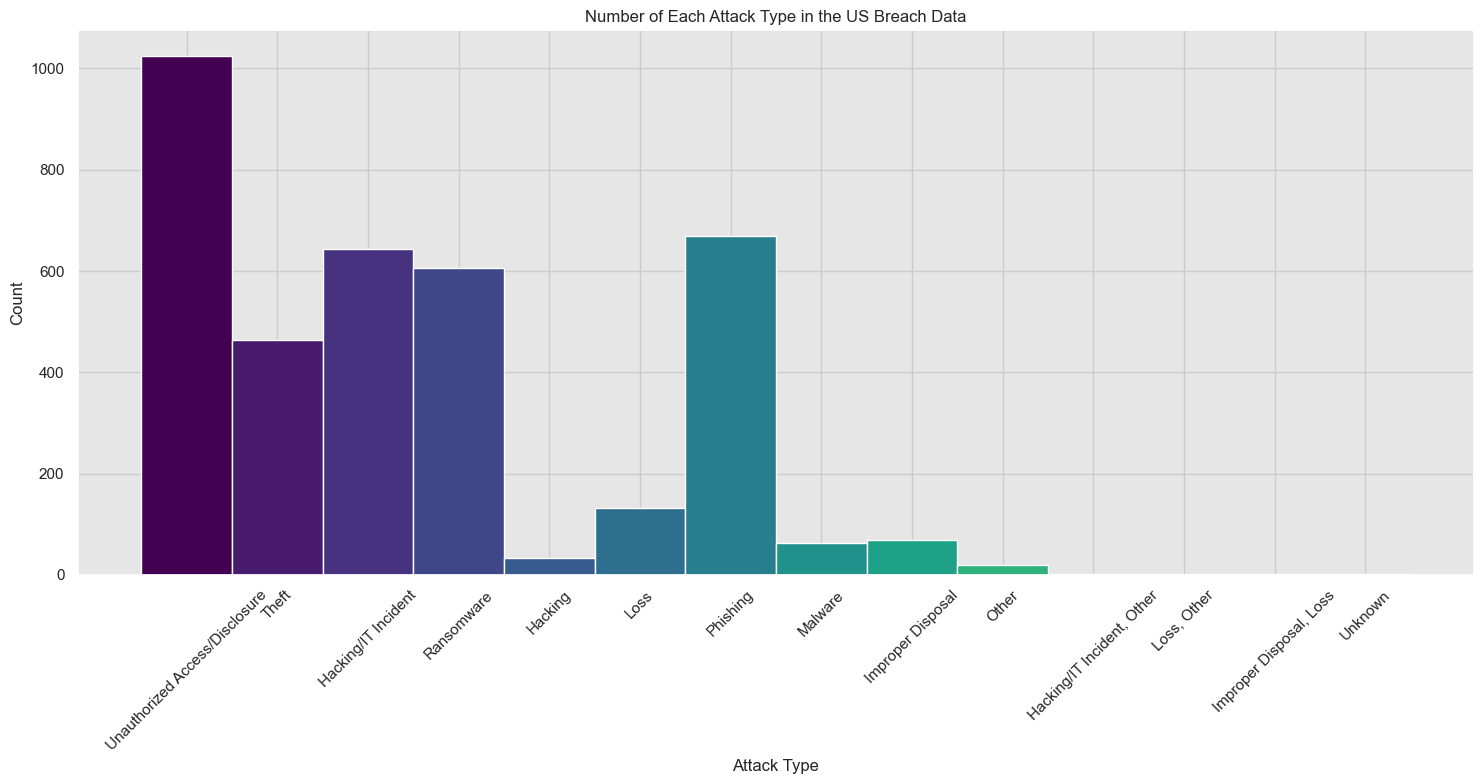

In [11]:



# Set the style of seaborn with a light grey background

sns.set(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})

# Create a histogram with the updated background color
plt.figure(figsize=(15, 8))
# Use the 'palette' argument to set different colors for each bar.
ax = sns.histplot(data=df_2014_to_2022, x='Attack Type', kde=False, bins=len(df_2014_to_2022['Attack Type'].unique()))

# Manually set the colors of each bar
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(plt.cm.viridis(i / len(df_2014_to_2022['Attack Type'].unique())))
plt.title('Number of Each Attack Type in the US Breach Data')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-ticks for better visibility
plt.tight_layout()
plt.show()


In [12]:
# Saving both files to directory...

# File paths for saving the DataFrames..
# Save to own file path as appropriate...

#file_path_2014_to_2022 = "/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/breach_data_2014_to_2022.csv"
#file_path_2023 = "/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/breach_data_2023.csv"

# Saving the 2014 to 2022 DataFrame to CSV

#df_2014_to_2022.to_csv(file_path_2014_to_2022, index=False)

# Saving the 2023 DataFrame to CSV

#df_2023_only.to_csv(file_path_2023, index=False)

# Confirming the files have been saved

#file_path_2014_to_2022, file_path_2023


# Exploratory Analysis of Dataset 2014-2022. 
<br>
<font size = '4.0'> 
    
**To achieve this, the data must first be converted to a time series.** <br> 

**This data will also be saved so as to combine it with the uk_time_series data.**</font>

In [13]:
breach_data = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/breach_data_2014_to_2022.csv')
breach_data.head()

,Breach Submission Date,Attack Type
0,2022-12-29,Unauthorized Access/Disclosure
1,2022-12-29,Unauthorized Access/Disclosure
2,2022-12-14,Theft
3,2022-12-08,Hacking/IT Incident
4,2022-11-29,Unauthorized Access/Disclosure


In [14]:
# Ensure the "Breach Submission Date" column is of datetime type
breach_data['Breach Submission Date'] = pd.to_datetime(breach_data['Breach Submission Date'])

# Set this column as the index
breach_data_indexed = breach_data.set_index('Breach Submission Date')

# Perform the resampling
monthly_breaches = breach_data_indexed.resample('M').size().reset_index()

# Rename the columns
monthly_breaches.columns = ['Year', 'no_of_attacks']

# Display the first few rows
monthly_breaches.head()






,Year,no_of_attacks
0,2014-01-31,36
1,2014-02-28,24
2,2014-03-31,34
3,2014-04-30,38
4,2014-05-31,16


In [15]:
# Rename the resampled data as us_incidents, and save to file(local machine)

us_incidents = monthly_breaches


# Save the DataFrame to a CSV file
#save_path = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/us_incidents.csv'

#us_incidents.to_csv(save_path, index=False)

#save_path

In [16]:
us_incidents.head()

,Year,no_of_attacks
0,2014-01-31,36
1,2014-02-28,24
2,2014-03-31,34
3,2014-04-30,38
4,2014-05-31,16


## Exploratory Analysis on the US dataset.  

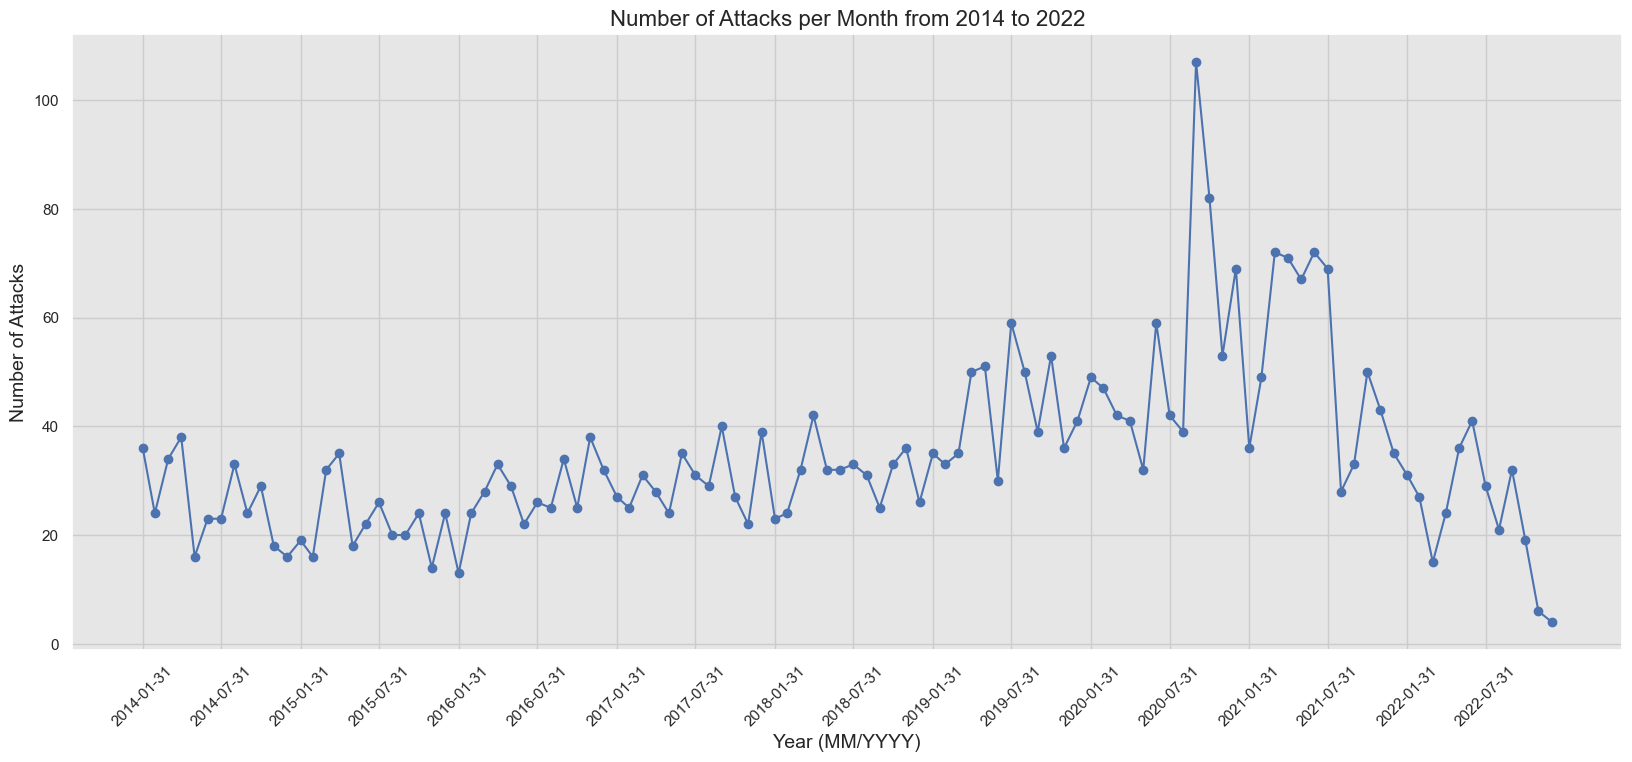

In [17]:
# Plotting the data
plt.figure(figsize=(20, 8))
plt.plot(us_incidents['Year'], us_incidents['no_of_attacks'], marker='o', linestyle='-')
plt.xlabel('Year (MM/YYYY)', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Number of Attacks per Month from 2014 to 2022', fontsize=16)
# Select a subset of x-ticks to display for better readability
plt.xticks(us_incidents['Year'][::6], rotation=45)
plt.grid(True)
plt.show()


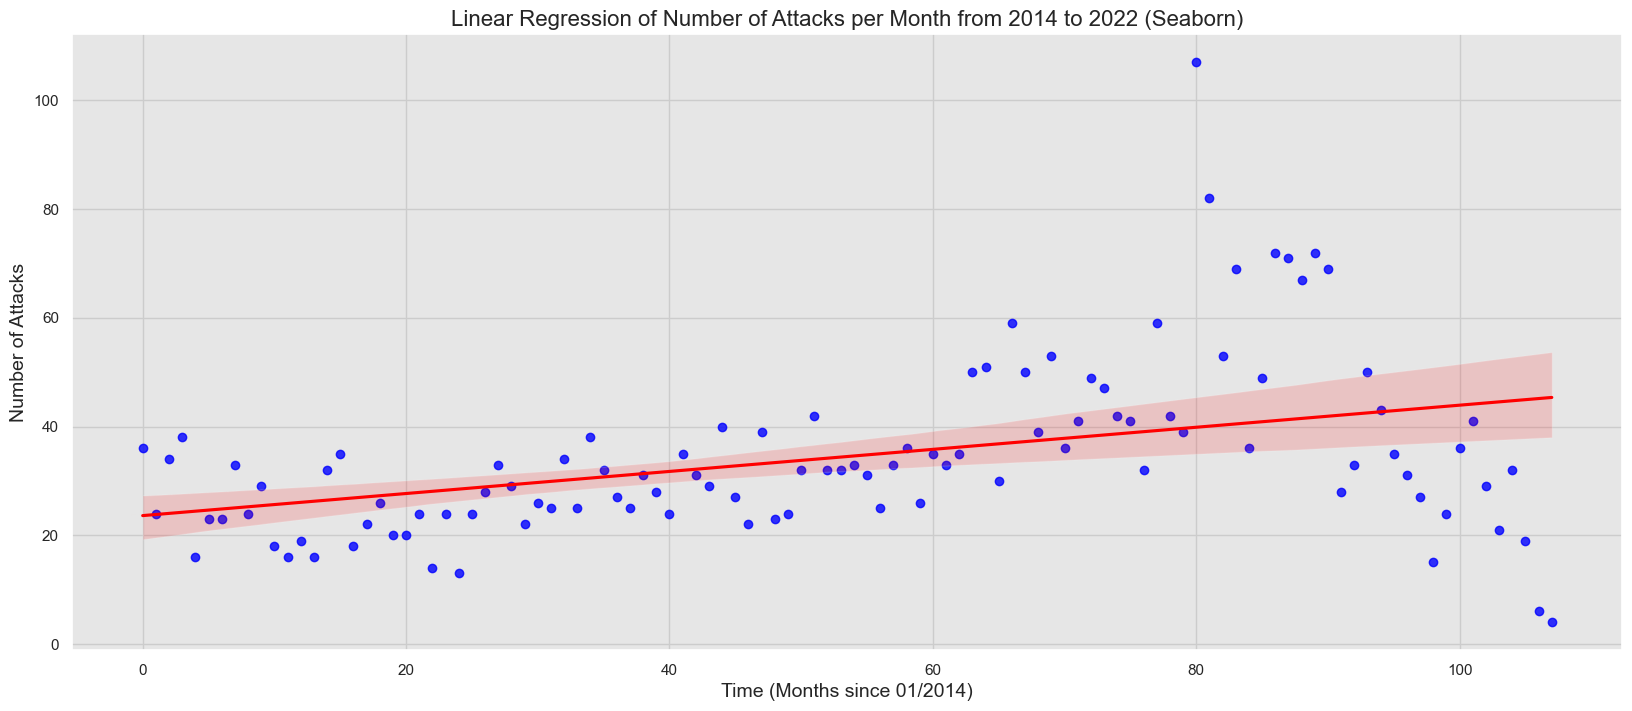

(array([0.20310193]), 23.615528372409102)

In [18]:
# Importing necessary libraries for linear regression
from sklearn.linear_model import LinearRegression


# Prepare the data for linear regression

# use the index as the x-values to represent the time series nature of the data

X = np.arange(len(us_incidents)).reshape(-1, 1)
y = us_incidents['no_of_attacks'].values

# Fit the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Make predictions
y_pred = linear_regressor.predict(X)

# Create the plot using seaborn's regplot
plt.figure(figsize=(20, 8))
sns.regplot(x=np.arange(len(us_incidents)), y=us_incidents['no_of_attacks'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Time (Months since 01/2014)', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Linear Regression of Number of Attacks per Month from 2014 to 2022 (Seaborn)', fontsize=16)
plt.grid(True)
plt.show()

# Return the coefficients

linear_regressor.coef_, linear_regressor.intercept_


The linear regression model has been plotted alongside the actual data points:

The blue dots represent the actual number of attacks for each month.
The red line represents the linear regression model. 

The equation of the linear regression line is: Number of Attacks = 0.2031×(Months since 01/2014)+ 23.62

Where:The slope (coefficient) is approximately 0.2031The y-intercept is approximately 23.62

This model therefore suggests a slight upward trend in the number of attacks over time, although the slope is relatively small.

## Data Source : US Department of Health and Human services.  Office for Civil Rights: 
### Breach Portal: Notice to the Secretary of HHS Breach of Unsecured Protected Health   Information.  

**Website: https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf**

## This script is part of the author's research project, initial stage: Data Cleaning.


    
### This script can be reproduced without permission.
    


### Author : Chinyere.O.Ugorji &copy; 2023

In [19]:
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 14:49:34) [Clang 14.0.6 ]
